## Please follow the below structure while attempting the hackathon, make sure to submit only one jupyter file with all the models, and you can always mention your best model by giving it the header as 'Best Model'.

## Please make sure to maintain the clarity of analysis in the notebook with proper headers and inisghts/inferences, so that it can be interpretable 


## Please follow the same format as mentioned below, as you will be evaluated basis on your Jupyter Notebook for L2 selection.

## Importing Necessary Libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.ensemble import RandomForestClassifier

## 2 Exploratory Data Analyis

In this section you can talk about the plots and the insights you have generated from the data

In [2]:
# load the train csv file
# store the data in 'df_train'
df_train = pd.read_csv('Data_Train.csv')
print(df_train.shape)
# display first five observations using head()
df_train.head()

(87500, 30)


,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
0,95074,421802,II,>10yrs,Vfied,633600.000000,MOR??AGE,0,0,GLENDALE NISSAN,12.549600,91300.000000,42023.250000,0,15.390000,88.924000,3,607161.900000,0.000000,19,fully paid,California,17,58598.000000,3 years,31216.050000,debt consolidation,I,0.000000,0
1,134131,3964312,IV,7yrs,Source Verified,85483.200000,REN?,0,0,Business Teacher,9.004800,27400.000000,38133.000000,0,9.940000,102.856000,0,269234.060000,0.000000,30,whole,NC,15,18924.000000,5 years,11660.490000,debt consolidation,I,0.000000,0
2,92602,4247560,III,<1yr,Source Verified,79200.000000,REN?,0,0,driver,24.914400,32800.000000,17100.000000,0,22.350000,60.372000,0,22476.530000,0.000000,25,whole,Florida,7,15604.000000,5 years,5637.870000,major purchase,I,0.000000,0
3,22591,197179,III,<1yr,Vfied,61600.000000,REN?,0,0,AvePoint,16.581600,7000.000000,5130.000000,0,10.360000,116.272000,1,15242.090000,0.000000,22,fully paid,NewJersey,9,22410.000000,3 years,15607.170000,major purchase,I,0.000000,1
4,125060,4646684,V,2yrs,Source Verified,68053.920000,REN?,0,0,Lead Tester,40.051200,70800.000000,19665.000000,0,13.680000,127.280000,1,65433.940000,0.000000,32,fully paid,LA,10,36022.000000,5 years,27472.860000,debt consolidation,I,0.000000,0


In [3]:
# load the train csv file
# store the data in 'df_train'
df_test = pd.read_csv('Data_Test.csv')
print(df_test.shape)
# display first five observations using head()
df_test.head()


(37500, 29)


,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee
0,198980,1773284,II,2yrs,Source Verified,140800.000000,OWN,0,0,processor,16.917600,90600.000000,17955.000000,0,8.880000,78.432000,1,59769.300000,0.000000,17,fully paid,California,23,33532.000000,3 years,15755.940000,major purchase,I,0.000000
1,167688,5298273,II,>10yrs,Vfied,146080.000000,MOR??AGE,0,0,Speech Language Pathologist,28.694400,32300.000000,59850.000000,0,10.100000,76.368000,1,532962.130000,0.000000,19,whole,Florida,17,149234.000000,5 years,68237.550000,debt consolidation,I,0.000000
2,198768,189781,VI,>10yrs,Vfied,202222.240000,MOR??AGE,0,0,Raytheon,51.156000,88000.000000,59850.000000,0,19.300000,157.552000,2,288816.480000,0.000000,37,whole,NM,15,70218.000000,5 years,66272.760000,debt consolidation,I,0.000000
3,192564,1530906,II,>10yrs,Vfied,105600.000000,MOR??AGE,1,0,Computer/Network Technician,27.014400,19900.000000,19323.000000,0,8.820000,32.852000,2,424664.300000,0.000000,19,fully paid,DE,18,79182.000000,3 years,15595.200000,credit card,I,0.000000
4,151199,4410316,III,4yrs,Not Vfied,151360.000000,MOR??AGE,0,0,NDE Tech,10.382400,34900.000000,25350.750000,1,13.520000,108.532000,1,251704.070000,0.000000,25,fully paid,Florida,7,13612.000000,3 years,8850.960000,debt consolidation,I,0.000000


In [4]:
df = pd.concat([df_train,df_test])
df.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
0,95074,421802,II,>10yrs,Vfied,633600.000000,MOR??AGE,0,0,GLENDALE NISSAN,12.549600,91300.000000,42023.250000,0,15.390000,88.924000,3,607161.900000,0.000000,19,fully paid,California,17,58598.000000,3 years,31216.050000,debt consolidation,I,0.000000,0.000000
1,134131,3964312,IV,7yrs,Source Verified,85483.200000,REN?,0,0,Business Teacher,9.004800,27400.000000,38133.000000,0,9.940000,102.856000,0,269234.060000,0.000000,30,whole,NC,15,18924.000000,5 years,11660.490000,debt consolidation,I,0.000000,0.000000
2,92602,4247560,III,<1yr,Source Verified,79200.000000,REN?,0,0,driver,24.914400,32800.000000,17100.000000,0,22.350000,60.372000,0,22476.530000,0.000000,25,whole,Florida,7,15604.000000,5 years,5637.870000,major purchase,I,0.000000,0.000000
3,22591,197179,III,<1yr,Vfied,61600.000000,REN?,0,0,AvePoint,16.581600,7000.000000,5130.000000,0,10.360000,116.272000,1,15242.090000,0.000000,22,fully paid,NewJersey,9,22410.000000,3 years,15607.170000,major purchase,I,0.000000,1.000000
4,125060,4646684,V,2yrs,Source Verified,68053.920000,REN?,0,0,Lead Tester,40.051200,70800.000000,19665.000000,0,13.680000,127.280000,1,65433.940000,0.000000,32,fully paid,LA,10,36022.000000,5 years,27472.860000,debt consolidation,I,0.000000,0.000000


In [5]:
df['Home Status'].replace(to_replace =["REN?", "MOR??AGE"], 
                            value =["RENT","MORTTAGE"],inplace = True)

In [6]:
df1 = df

In [7]:
df.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
0,95074,421802,II,>10yrs,Vfied,633600.000000,MORTTAGE,0,0,GLENDALE NISSAN,12.549600,91300.000000,42023.250000,0,15.390000,88.924000,3,607161.900000,0.000000,19,fully paid,California,17,58598.000000,3 years,31216.050000,debt consolidation,I,0.000000,0.000000
1,134131,3964312,IV,7yrs,Source Verified,85483.200000,RENT,0,0,Business Teacher,9.004800,27400.000000,38133.000000,0,9.940000,102.856000,0,269234.060000,0.000000,30,whole,NC,15,18924.000000,5 years,11660.490000,debt consolidation,I,0.000000,0.000000
2,92602,4247560,III,<1yr,Source Verified,79200.000000,RENT,0,0,driver,24.914400,32800.000000,17100.000000,0,22.350000,60.372000,0,22476.530000,0.000000,25,whole,Florida,7,15604.000000,5 years,5637.870000,major purchase,I,0.000000,0.000000
3,22591,197179,III,<1yr,Vfied,61600.000000,RENT,0,0,AvePoint,16.581600,7000.000000,5130.000000,0,10.360000,116.272000,1,15242.090000,0.000000,22,fully paid,NewJersey,9,22410.000000,3 years,15607.170000,major purchase,I,0.000000,1.000000
4,125060,4646684,V,2yrs,Source Verified,68053.920000,RENT,0,0,Lead Tester,40.051200,70800.000000,19665.000000,0,13.680000,127.280000,1,65433.940000,0.000000,32,fully paid,LA,10,36022.000000,5 years,27472.860000,debt consolidation,I,0.000000,0.000000


In [8]:
df.shape

(125000, 30)

In [9]:
df.dtypes

ID                       int64
Asst_Reg                 int64
GGGrade                 object
Experience              object
Validation              object
Yearly Income          float64
Home Status             object
Unpaid 2 years           int64
Already Defaulted        int64
Designation             object
Debt to Income         float64
Postal Code            float64
Lend Amount            float64
Deprecatory Records      int64
Interest Charged       float64
Usage Rate             float64
Inquiries                int64
Present Balance        float64
Gross Collection       float64
Sub GGGrade              int64
File Status             object
State                   object
Account Open             int64
Total Unpaid CL        float64
Duration                object
Unpaid Amount          float64
Reason                  object
Claim Type              object
Due Fee                float64
Loan/No Loan           float64
dtype: object

In [10]:
df['Unpaid 2 years'].value_counts()

0     99683
1     16570
2      5159
3      1816
4       839
5       399
6       238
7       110
8        66
9        34
10       30
12       19
11       15
13        5
14        5
18        5
15        3
16        2
17        2
Name: Unpaid 2 years, dtype: int64

In [11]:
df['Experience'].value_counts()

>10yrs    44008
2yrs      11476
3yrs      10478
<1yr      10311
1yrs       8296
5yrs       8035
4yrs       7563
8yrs       6748
7yrs       6731
6yrs       6112
9yrs       5242
Name: Experience, dtype: int64

In [12]:
df['Loan/No Loan']  = df['Loan/No Loan'].fillna(0)
df['Postal Code'] = df['Postal Code'].fillna(df['Postal Code'].mode()[0])

In [13]:
df['Unpaid 2 years'] = df['Unpaid 2 years'].astype(object)
df['Already Defaulted'] = df['Already Defaulted'].astype(object)
#df['Deprecatory Records'] = df['Deprecatory Records'].astype(object)
df['Postal Code'] = df['Postal Code'].astype(int)
df['Loan/No Loan'] = df['Loan/No Loan'].astype(int)

In [14]:
df.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
0,95074,421802,II,>10yrs,Vfied,633600.000000,MORTTAGE,0,0,GLENDALE NISSAN,12.549600,91300,42023.250000,0,15.390000,88.924000,3,607161.900000,0.000000,19,fully paid,California,17,58598.000000,3 years,31216.050000,debt consolidation,I,0.000000,0
1,134131,3964312,IV,7yrs,Source Verified,85483.200000,RENT,0,0,Business Teacher,9.004800,27400,38133.000000,0,9.940000,102.856000,0,269234.060000,0.000000,30,whole,NC,15,18924.000000,5 years,11660.490000,debt consolidation,I,0.000000,0
2,92602,4247560,III,<1yr,Source Verified,79200.000000,RENT,0,0,driver,24.914400,32800,17100.000000,0,22.350000,60.372000,0,22476.530000,0.000000,25,whole,Florida,7,15604.000000,5 years,5637.870000,major purchase,I,0.000000,0
3,22591,197179,III,<1yr,Vfied,61600.000000,RENT,0,0,AvePoint,16.581600,7000,5130.000000,0,10.360000,116.272000,1,15242.090000,0.000000,22,fully paid,NewJersey,9,22410.000000,3 years,15607.170000,major purchase,I,0.000000,1
4,125060,4646684,V,2yrs,Source Verified,68053.920000,RENT,0,0,Lead Tester,40.051200,70800,19665.000000,0,13.680000,127.280000,1,65433.940000,0.000000,32,fully paid,LA,10,36022.000000,5 years,27472.860000,debt consolidation,I,0.000000,0


## 1 Data Cleaning

In [15]:
Total = df.isnull().sum().sort_values(ascending=False)          

Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Yearly Income,8000,6.400000
Unpaid Amount,6921,5.536800
Total Unpaid CL,6000,4.800000
Debt to Income,5000,4.000000
Designation,2000,1.600000
ID,0,0.000000
Present Balance,0,0.000000
Due Fee,0,0.000000
Claim Type,0,0.000000
Reason,0,0.000000


<AxesSubplot:>

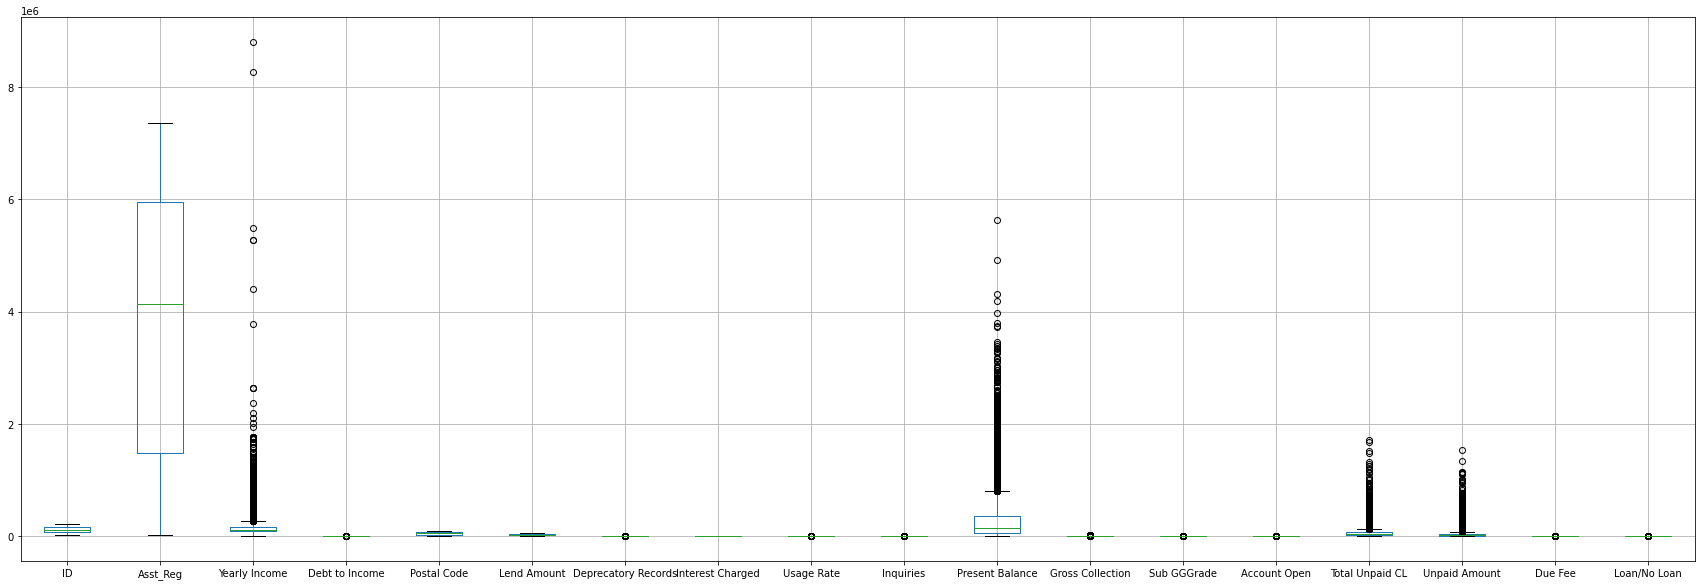

In [16]:
plt.figure(figsize=(30,10))
df.boxplot()

In [17]:
num_col = df.select_dtypes(include = [np.number])
num_col.columns

Index(['ID', 'Asst_Reg', 'Yearly Income', 'Debt to Income', 'Postal Code',
       'Lend Amount', 'Deprecatory Records', 'Interest Charged', 'Usage Rate',
       'Inquiries', 'Present Balance', 'Gross Collection', 'Sub GGGrade',
       'Account Open', 'Total Unpaid CL', 'Unpaid Amount', 'Due Fee',
       'Loan/No Loan'],
      dtype='object')

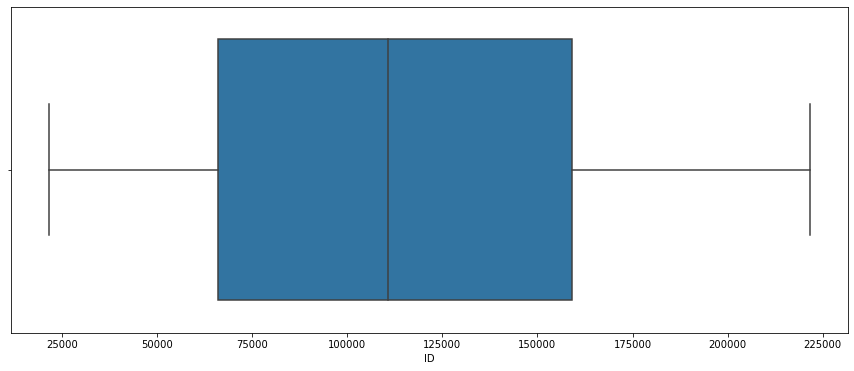

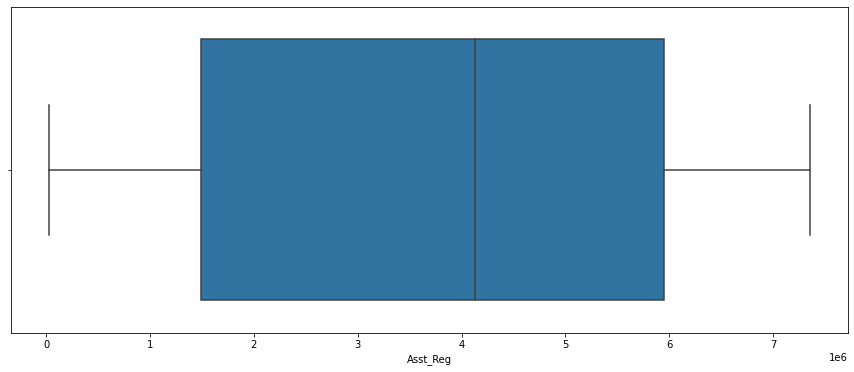

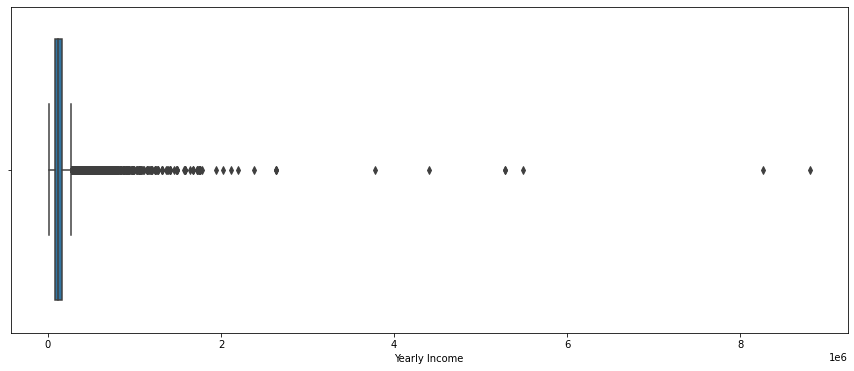

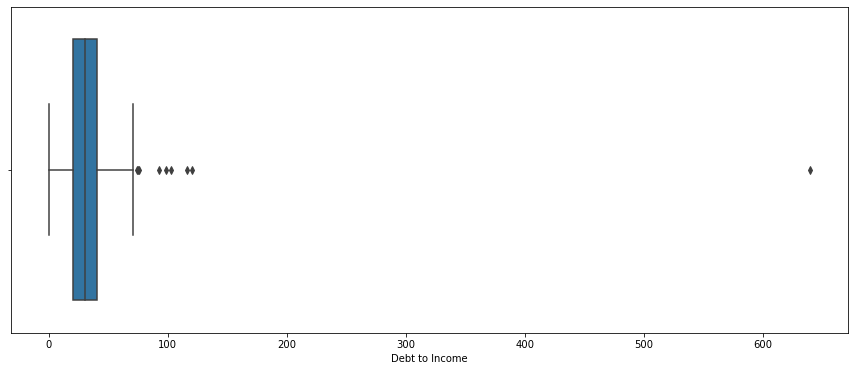

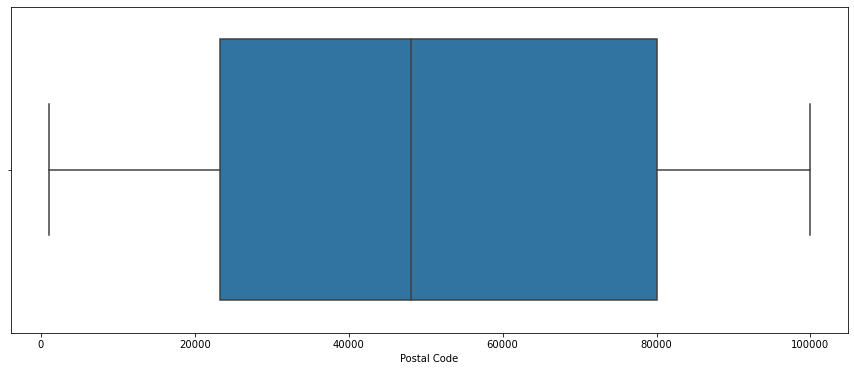

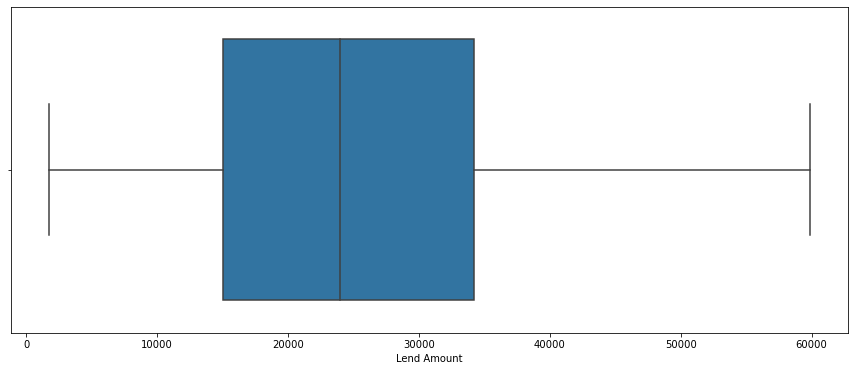

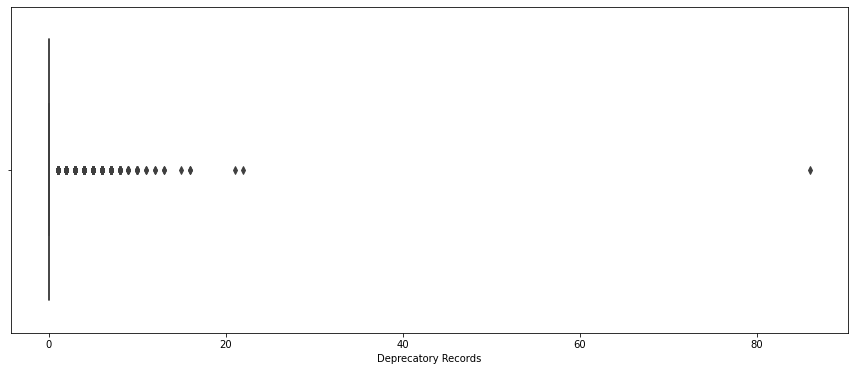

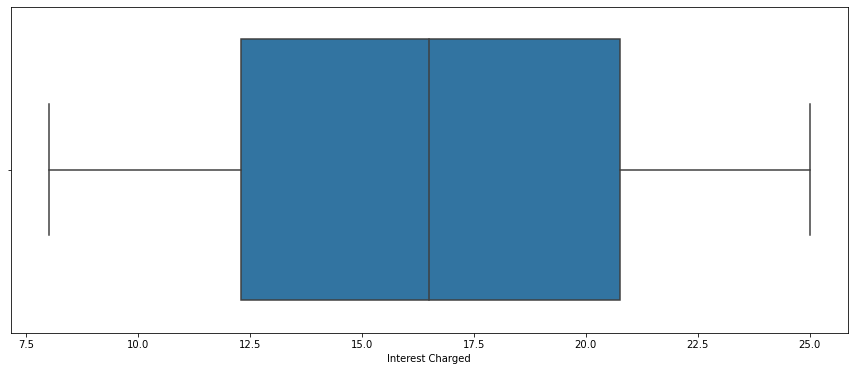

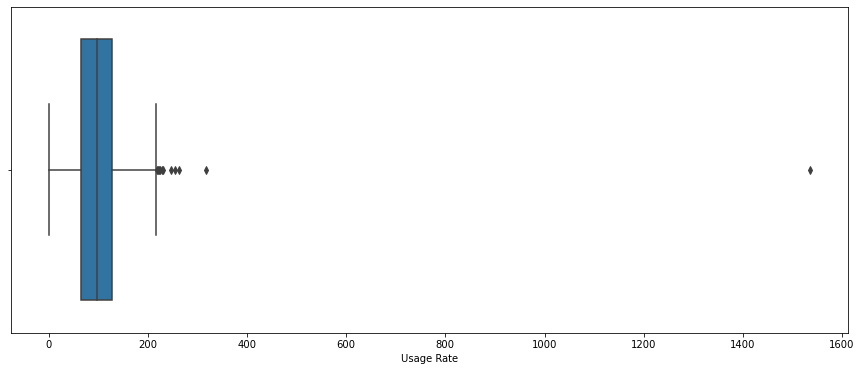

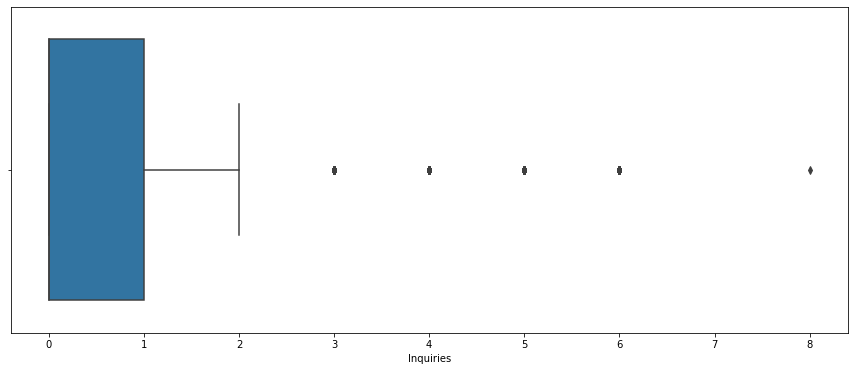

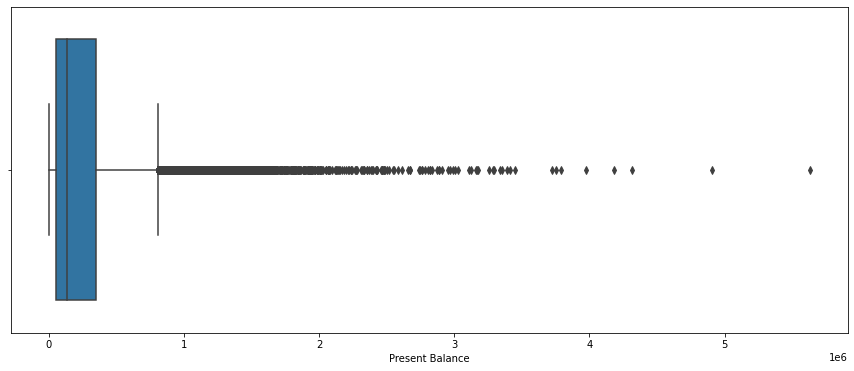

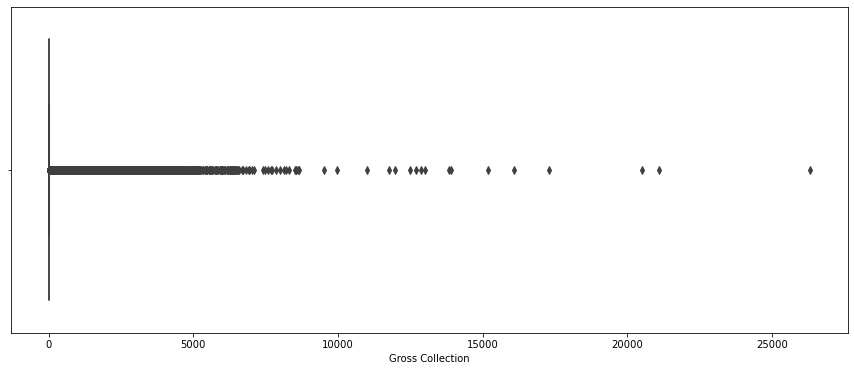

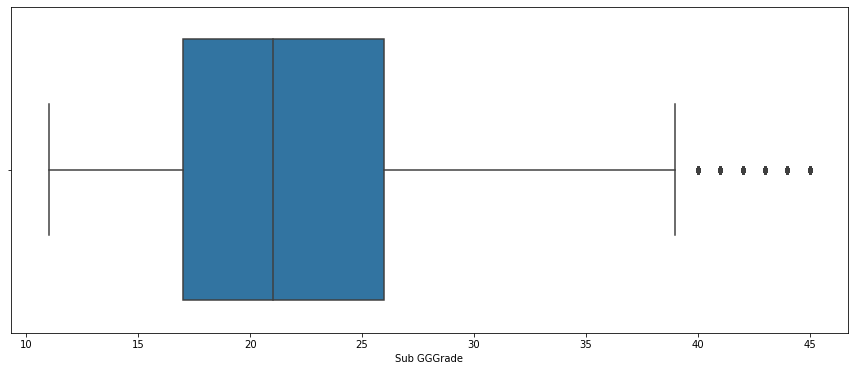

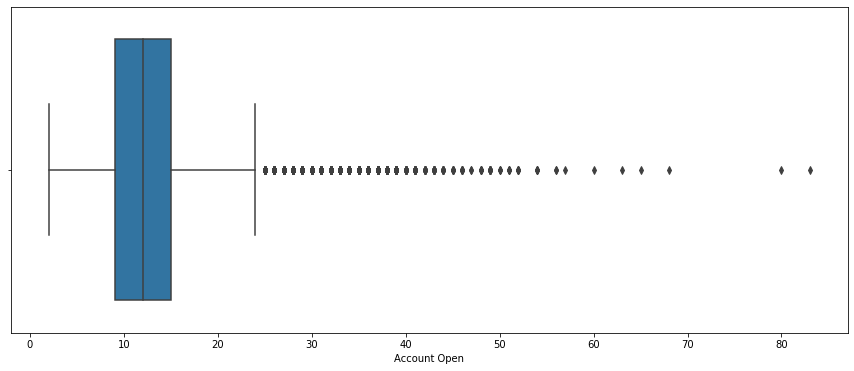

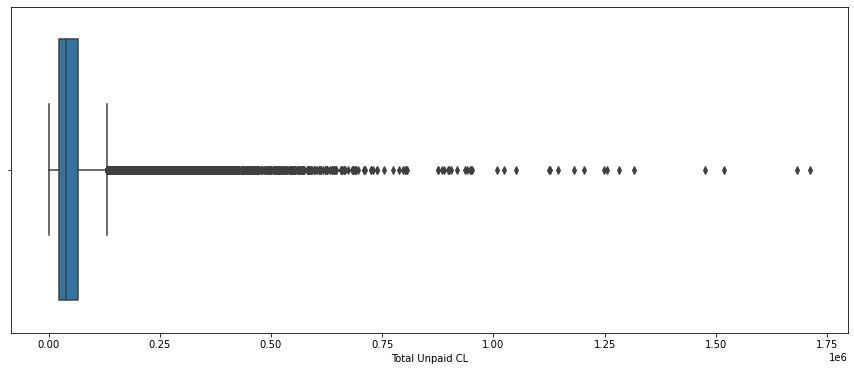

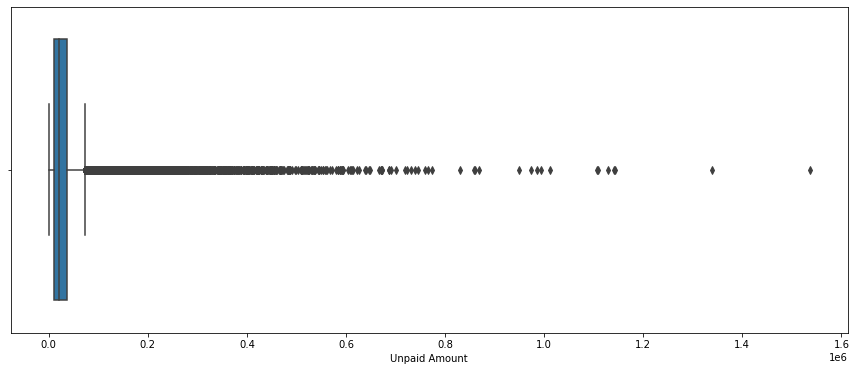

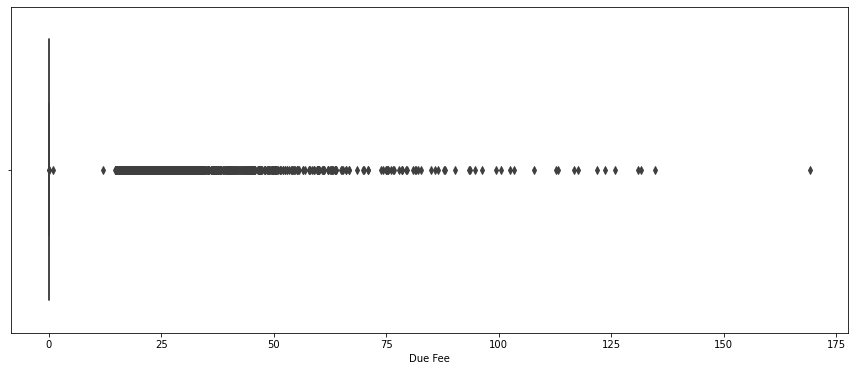

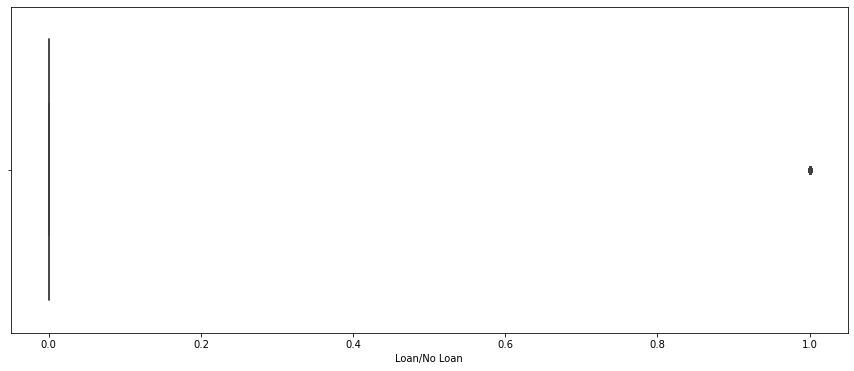

In [18]:
for i in num_col.columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(x = df[i])

In [19]:
df['Yearly Income'] = df['Yearly Income'].fillna(df['Yearly Income'].median())
df['Total Unpaid CL'] = df['Total Unpaid CL'].fillna(df['Total Unpaid CL'].median())
df['Debt to Income'] = df['Debt to Income'].fillna(df['Debt to Income'].median())
df['Unpaid Amount'] = df['Unpaid Amount'].fillna(df['Unpaid Amount'].median())
df['Designation'] = df['Designation'].fillna(df['Designation'].mode()[0])

In [20]:
Total = df.isnull().sum().sort_values(ascending=False)          

Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
ID,0,0.000000
Asst_Reg,0,0.000000
Due Fee,0,0.000000
Claim Type,0,0.000000
Reason,0,0.000000
Unpaid Amount,0,0.000000
Duration,0,0.000000
Total Unpaid CL,0,0.000000
Account Open,0,0.000000
State,0,0.000000


## 3 Feature Engineering

In this section you can implement the feature engineering techniques for dimensionality reduction

In [21]:
df_target = df['Loan/No Loan']
df_feature = df.drop('Loan/No Loan', axis = 1)

In [22]:
df_feature.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee
0,95074,421802,II,>10yrs,Vfied,633600.000000,MORTTAGE,0,0,GLENDALE NISSAN,12.549600,91300,42023.250000,0,15.390000,88.924000,3,607161.900000,0.000000,19,fully paid,California,17,58598.000000,3 years,31216.050000,debt consolidation,I,0.000000
1,134131,3964312,IV,7yrs,Source Verified,85483.200000,RENT,0,0,Business Teacher,9.004800,27400,38133.000000,0,9.940000,102.856000,0,269234.060000,0.000000,30,whole,NC,15,18924.000000,5 years,11660.490000,debt consolidation,I,0.000000
2,92602,4247560,III,<1yr,Source Verified,79200.000000,RENT,0,0,driver,24.914400,32800,17100.000000,0,22.350000,60.372000,0,22476.530000,0.000000,25,whole,Florida,7,15604.000000,5 years,5637.870000,major purchase,I,0.000000
3,22591,197179,III,<1yr,Vfied,61600.000000,RENT,0,0,AvePoint,16.581600,7000,5130.000000,0,10.360000,116.272000,1,15242.090000,0.000000,22,fully paid,NewJersey,9,22410.000000,3 years,15607.170000,major purchase,I,0.000000
4,125060,4646684,V,2yrs,Source Verified,68053.920000,RENT,0,0,Lead Tester,40.051200,70800,19665.000000,0,13.680000,127.280000,1,65433.940000,0.000000,32,fully paid,LA,10,36022.000000,5 years,27472.860000,debt consolidation,I,0.000000


In [23]:
df_feature = df_feature.drop('ID', axis = 1)
df_feature = df_feature.drop('Postal Code', axis = 1)
df_feature = df_feature.drop('Validation', axis = 1)

In [24]:
df_feature.shape

(125000, 26)

In [25]:
df_num = df_feature.select_dtypes(include = [np.number])
df_num.columns

Index(['Asst_Reg', 'Yearly Income', 'Debt to Income', 'Lend Amount',
       'Deprecatory Records', 'Interest Charged', 'Usage Rate', 'Inquiries',
       'Present Balance', 'Gross Collection', 'Sub GGGrade', 'Account Open',
       'Total Unpaid CL', 'Unpaid Amount', 'Due Fee'],
      dtype='object')

In [26]:
df_cat = df_feature.select_dtypes(include = [np.object])

# display categorical features
df_cat.columns

Index(['GGGrade', 'Experience', 'Home Status', 'Unpaid 2 years',
       'Already Defaulted', 'Designation', 'File Status', 'State', 'Duration',
       'Reason', 'Claim Type'],
      dtype='object')

In [27]:
df_cat1 = df_cat.drop('Designation', axis = 1)

In [28]:
dummy_var1 = pd.get_dummies(data = df_cat1,columns = df_cat1.columns,drop_first = True)

In [29]:
dummy_var1.shape

(125000, 107)

In [30]:
dummy_var1.head()

,GGGrade_II,GGGrade_III,GGGrade_IV,GGGrade_V,GGGrade_VI,GGGrade_VII,Experience_2yrs,Experience_3yrs,Experience_4yrs,Experience_5yrs,Experience_6yrs,Experience_7yrs,Experience_8yrs,Experience_9yrs,Experience_<1yr,Experience_>10yrs,Home Status_NONE,Home Status_OTHER,Home Status_OWN,Home Status_RENT,Unpaid 2 years_1,Unpaid 2 years_2,Unpaid 2 years_3,Unpaid 2 years_4,Unpaid 2 years_5,Unpaid 2 years_6,Unpaid 2 years_7,Unpaid 2 years_8,Unpaid 2 years_9,Unpaid 2 years_10,Unpaid 2 years_11,Unpaid 2 years_12,Unpaid 2 years_13,Unpaid 2 years_14,Unpaid 2 years_15,Unpaid 2 years_16,Unpaid 2 years_17,Unpaid 2 years_18,Already Defaulted_1,Already Defaulted_2,Already Defaulted_3,Already Defaulted_4,Already Defaulted_5,Already Defaulted_6,File Status_whole,State_AL,State_AR,State_AZ,State_CO,State_CT,State_California,State_DC,State_DE,State_Florida,State_GA,State_HI,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_Maryland,State_NC,State_ND,State_NE,State_NH,State_NM,State_NV,State_NewJersey,State_Newyork,State_OK,State_OR,State_Ohio,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Duration_5 years,Reason_credit card,Reason_debt consolidation,Reason_home improvement,Reason_house,Reason_major purchase,Reason_medical,Reason_moving,Reason_other,Reason_renewable energy,Reason_small business,Reason_vacation,Reason_wedding,Claim Type_J
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [31]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df_cat['Designation']= label_encoder.fit_transform(df_cat['Designation'])

In [32]:
dummy_design = df_cat['Designation']
#dummy_design = pd.get_dummies(data = df_cat,columns = ['Designation'],drop_first = True)

In [33]:
dummy_var1 = dummy_var1.reset_index(drop=True)
dummy_design = dummy_design.reset_index(drop=True)

In [34]:
dummy_var1.head()

,GGGrade_II,GGGrade_III,GGGrade_IV,GGGrade_V,GGGrade_VI,GGGrade_VII,Experience_2yrs,Experience_3yrs,Experience_4yrs,Experience_5yrs,Experience_6yrs,Experience_7yrs,Experience_8yrs,Experience_9yrs,Experience_<1yr,Experience_>10yrs,Home Status_NONE,Home Status_OTHER,Home Status_OWN,Home Status_RENT,Unpaid 2 years_1,Unpaid 2 years_2,Unpaid 2 years_3,Unpaid 2 years_4,Unpaid 2 years_5,Unpaid 2 years_6,Unpaid 2 years_7,Unpaid 2 years_8,Unpaid 2 years_9,Unpaid 2 years_10,Unpaid 2 years_11,Unpaid 2 years_12,Unpaid 2 years_13,Unpaid 2 years_14,Unpaid 2 years_15,Unpaid 2 years_16,Unpaid 2 years_17,Unpaid 2 years_18,Already Defaulted_1,Already Defaulted_2,Already Defaulted_3,Already Defaulted_4,Already Defaulted_5,Already Defaulted_6,File Status_whole,State_AL,State_AR,State_AZ,State_CO,State_CT,State_California,State_DC,State_DE,State_Florida,State_GA,State_HI,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_Maryland,State_NC,State_ND,State_NE,State_NH,State_NM,State_NV,State_NewJersey,State_Newyork,State_OK,State_OR,State_Ohio,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Duration_5 years,Reason_credit card,Reason_debt consolidation,Reason_home improvement,Reason_house,Reason_major purchase,Reason_medical,Reason_moving,Reason_other,Reason_renewable energy,Reason_small business,Reason_vacation,Reason_wedding,Claim Type_J
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [35]:
dummy_var = pd.concat([dummy_var1,dummy_design], axis = 1)

In [36]:
dummy_var.shape

(125000, 108)

In [37]:
X_scaler = StandardScaler()

# scale all the numerical columns
# standardize all the columns of the dataframe 'df_num'
num_scaled = X_scaler.fit_transform(df_num)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

In [38]:
dummy_var.head()

,GGGrade_II,GGGrade_III,GGGrade_IV,GGGrade_V,GGGrade_VI,GGGrade_VII,Experience_2yrs,Experience_3yrs,Experience_4yrs,Experience_5yrs,Experience_6yrs,Experience_7yrs,Experience_8yrs,Experience_9yrs,Experience_<1yr,Experience_>10yrs,Home Status_NONE,Home Status_OTHER,Home Status_OWN,Home Status_RENT,Unpaid 2 years_1,Unpaid 2 years_2,Unpaid 2 years_3,Unpaid 2 years_4,Unpaid 2 years_5,Unpaid 2 years_6,Unpaid 2 years_7,Unpaid 2 years_8,Unpaid 2 years_9,Unpaid 2 years_10,Unpaid 2 years_11,Unpaid 2 years_12,Unpaid 2 years_13,Unpaid 2 years_14,Unpaid 2 years_15,Unpaid 2 years_16,Unpaid 2 years_17,Unpaid 2 years_18,Already Defaulted_1,Already Defaulted_2,Already Defaulted_3,Already Defaulted_4,Already Defaulted_5,Already Defaulted_6,File Status_whole,State_AL,State_AR,State_AZ,State_CO,State_CT,State_California,State_DC,State_DE,State_Florida,State_GA,State_HI,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_Maryland,State_NC,State_ND,State_NE,State_NH,State_NM,State_NV,State_NewJersey,State_Newyork,State_OK,State_OR,State_Ohio,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Duration_5 years,Reason_credit card,Reason_debt consolidation,Reason_home improvement,Reason_house,Reason_major purchase,Reason_medical,Reason_moving,Reason_other,Reason_renewable energy,Reason_small business,Reason_vacation,Reason_wedding,Claim Type_J,Designation
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,17359
1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,5616
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,48621
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3908
4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,22785


In [39]:
df_num_scale = df_num_scaled.reset_index(drop=True)

In [40]:
dummy_var_scale = dummy_var.reset_index(drop=True)

In [41]:
X = pd.concat([df_num_scale, dummy_var_scale], axis = 1)
X.head()

,Asst_Reg,Yearly Income,Debt to Income,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,Account Open,Total Unpaid CL,Unpaid Amount,Due Fee,GGGrade_II,GGGrade_III,GGGrade_IV,GGGrade_V,GGGrade_VI,GGGrade_VII,Experience_2yrs,Experience_3yrs,Experience_4yrs,Experience_5yrs,Experience_6yrs,Experience_7yrs,Experience_8yrs,Experience_9yrs,Experience_<1yr,Experience_>10yrs,Home Status_NONE,Home Status_OTHER,Home Status_OWN,Home Status_RENT,Unpaid 2 years_1,Unpaid 2 years_2,Unpaid 2 years_3,Unpaid 2 years_4,Unpaid 2 years_5,Unpaid 2 years_6,Unpaid 2 years_7,Unpaid 2 years_8,Unpaid 2 years_9,Unpaid 2 years_10,Unpaid 2 years_11,Unpaid 2 years_12,Unpaid 2 years_13,Unpaid 2 years_14,Unpaid 2 years_15,Unpaid 2 years_16,Unpaid 2 years_17,Unpaid 2 years_18,Already Defaulted_1,Already Defaulted_2,Already Defaulted_3,Already Defaulted_4,Already Defaulted_5,Already Defaulted_6,File Status_whole,State_AL,State_AR,State_AZ,State_CO,State_CT,State_California,State_DC,State_DE,State_Florida,State_GA,State_HI,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_Maryland,State_NC,State_ND,State_NE,State_NH,State_NM,State_NV,State_NewJersey,State_Newyork,State_OK,State_OR,State_Ohio,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Duration_5 years,Reason_credit card,Reason_debt consolidation,Reason_home improvement,Reason_house,Reason_major purchase,Reason_medical,Reason_moving,Reason_other,Reason_renewable energy,Reason_small business,Reason_vacation,Reason_wedding,Claim Type_J,Designation
0,-1.477083,5.205617,-1.336328,1.118288,-0.323972,-0.229589,-0.160744,2.421883,1.456193,-0.102839,-0.468466,0.786347,0.114660,0.061832,-0.089789,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,17359
1,0.071524,-0.497735,-1.594409,0.848586,-0.323972,-1.340666,0.182953,-0.699690,0.130108,-0.102839,1.233997,0.413764,-0.652374,-0.482442,-0.089789,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,5616
2,0.195346,-0.563114,-0.436104,-0.609583,-0.323972,1.189328,-0.865112,-0.699690,-0.838209,-0.102839,0.460150,-1.076568,-0.716561,-0.650065,-0.089789,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,48621
3,-1.575277,-0.746248,-1.042777,-1.439435,-0.323972,-1.255041,0.513921,0.340834,-0.866598,-0.102839,-0.004158,-0.703985,-0.584978,-0.372598,-0.089789,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3908
4,0.369823,-0.679093,0.665937,-0.431757,-0.323972,-0.578202,0.785485,0.340834,-0.669637,-0.102839,1.543536,-0.517694,-0.321812,-0.042349,-0.089789,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,22785


In this section you can do all the Data cleaning part of all necessary imputations and treatments























In [42]:
X.shape

(125000, 123)

In [43]:
# # type your code here
# sns.heatmap(X.corr(),annot=True)
# plt.show()

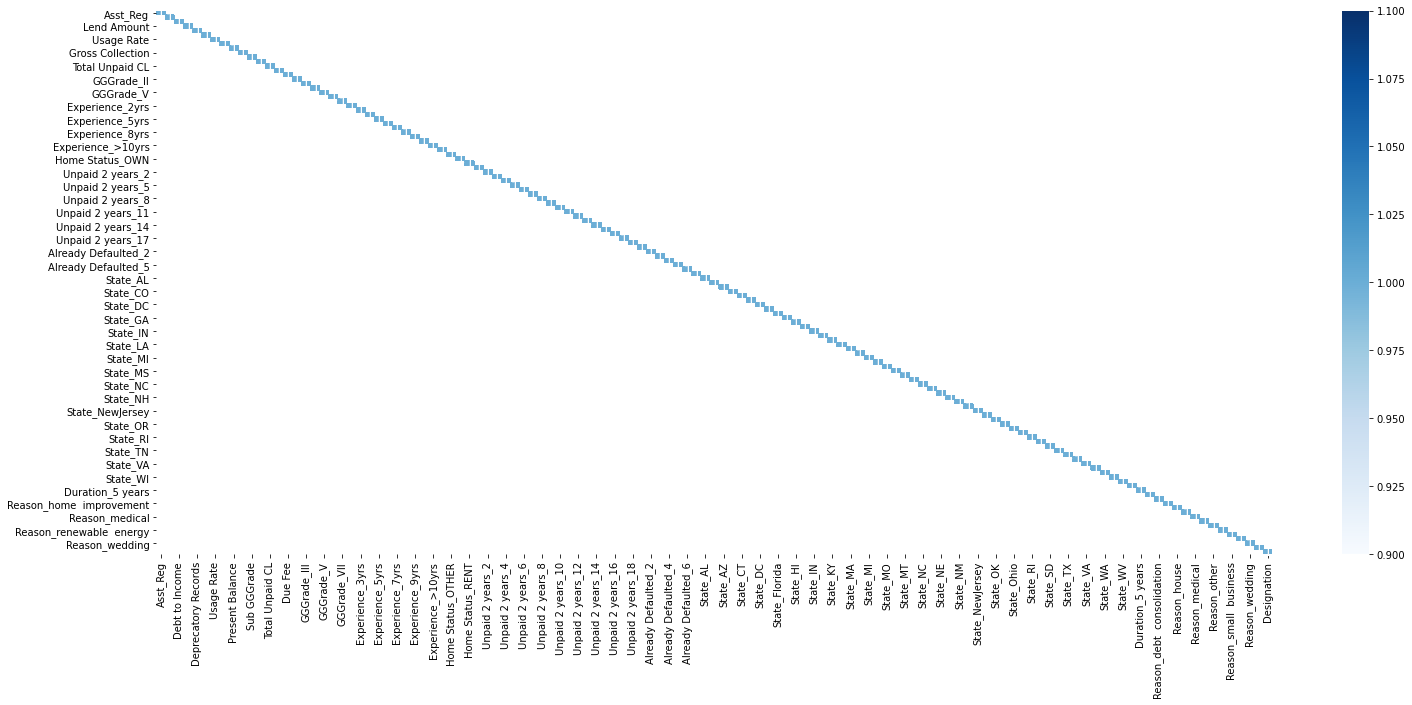

In [44]:
plt.figure(figsize = (25,10))
sns.heatmap(X.corr()[np.abs(X.corr()) == 1], annot = True, annot_kws = {"size": 13}, cmap = 'Blues')
plt.show()

In [45]:
X_train = X[:87500]
X_test  = X[87500:]
print(X_train.shape)
print(X_test.shape)

(87500, 123)
(37500, 123)


In [46]:
y_train = df_target[:87500]

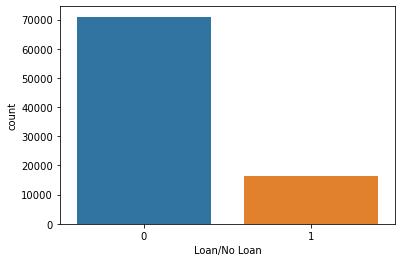

In [47]:
sns.countplot(y_train)
plt.show()

In [48]:
import imblearn
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

from imblearn.over_sampling import SMOTENC
oversample = SMOTENC(categorical_features=[0,1,2,3,4,9,10], random_state = 100)
X_train, y_train = oversample.fit_resample(X_train, y_train)

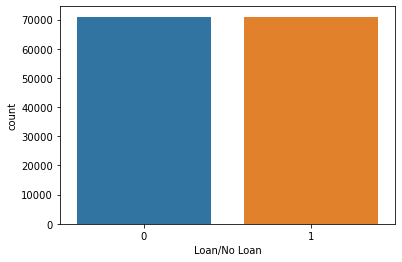

In [49]:
sns.countplot(y_train)
plt.show()

## 4 Modelling + HyperParameter Tuning

In this you can build various ML models and try tuning the parameters involved to achieve better score

## Model 1

In [51]:
def prepare_output_file(y_pred,file_name):
    y_pred_df = pd.DataFrame(y_pred,columns = ["Loan/No Loan"])
    df_test_id = pd.DataFrame(df_test['ID'])
    out = pd.concat([df_test_id,y_pred_df],axis = 1)
    print(out.shape)
    out.to_csv(file_name+".csv")

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
prepare_output_file(y_pred,'logreg')

In [ ]:
##Adaboost 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators = 80, random_state = 10)

# fit the model using fit() on train data
ada_model.fit(X_train, y_train)

y_pred=ada_model.predict(X_test)
prepare_output_file(y_pred,'AdaBoost')

## BEST MODEL

In [ ]:
select = SelectKBest(score_func=mutual_info_classif, k=50)
select.fit_transform(X_train,y_train)
cols = select.get_support(indices=True)
features_df_new = X_train.iloc[:,cols]
features_df_new.head()

In [ ]:
X_train1 = features_df_new
model = LogisticRegression()
model.fit(X_train1,y_train)
y_pred=model.predict(X_test[features_df_new.columns])
prepare_output_file(y_pred,'logreg_new_f')

In [ ]:
#based on the k best score i am chossing 70

In [ ]:
select = SelectKBest(score_func=mutual_info_classif, k=70)
select.fit_transform(X_train,y_train)
cols = select.get_support(indices=True)
features_df_new = X_train.iloc[:,cols]
features_df_new.head()
print(features_df_new.columns)
X_train1 = features_df_new
model = LogisticRegression()
model.fit(X_train1,y_train)
y_pred=model.predict(X_test[features_df_new.columns])
prepare_output_file(y_pred,'logreg_new_f70')

In [ ]:
##random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classification = RandomForestClassifier(criterion='entropy',n_estimators = 16, random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(X_train, y_train)
y_pred=rf_model.predict(X_test[features_df_new.columns])
prepare_output_file(y_pred,'randomfor')

In [ ]:
## Model 2 - Best Model

In [ ]:
##randomforerst with random search 

In [ ]:
rf_model = RandomForestClassifier()
param_dist = {
'n_estimators': list(range(50, 300, 10)),
'min_samples_leaf': list(range(1, 50)),
'max_depth': list(range(2, 20)),
'max_features': ['auto', 'sqrt'],
'bootstrap': [True, False]}
# specify number of search iterations
n_iter = 5
# Instantiate RandomSearchCV
model_random_search = RandomizedSearchCV(
estimator=rf_model,
param_distributions=param_dist,
n_iter=n_iter)
model_random_search.fit(X_train1, y_train)


In [ ]:
y_pred=model_random_search.predict(X_test[features_df_new.columns])
prepare_output_file(y_pred,'Randomsearch')

In [ ]:
##knn

In [52]:
X_traink, X_testk, y_traink, y_testk = train_test_split(X_train, y_train, random_state = 10, test_size = 0.2)

In [53]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
scaler_knn = MinMaxScaler()
features_names = X_traink.columns
X_train_knn = scaler_knn.fit_transform(X_traink)
X_train_knn = pd.DataFrame(X_train_knn, columns = features_names)
X_test_knn = scaler_knn.transform(X_testk)
X_test_knn = pd.DataFrame(X_test_knn, columns = features_names)

In [54]:
for k in range(1, 200, 5):
    k = k + 1
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_train_knn, y_traink)
    acc = knn.score(X_test_knn, y_testk)
    print('Accuracy for k =', k, ' is:', acc)

Accuracy for k = 2  is: 0.8616354416114945
Accuracy for k = 7  is: 0.8381814340047894
Accuracy for k = 12  is: 0.8431469221017045
Accuracy for k = 17  is: 0.8260318354697844
Accuracy for k = 22  is: 0.8260318354697844
Accuracy for k = 27  is: 0.817756021974926
Accuracy for k = 32  is: 0.818108184251303
Accuracy for k = 37  is: 0.8085998027891252
Accuracy for k = 42  is: 0.8076137484152698
Accuracy for k = 47  is: 0.799373151148049
Accuracy for k = 52  is: 0.7977884209043528
Accuracy for k = 57  is: 0.792083392027046
Accuracy for k = 62  is: 0.7909916889702775
Accuracy for k = 67  is: 0.7846175517678546
Accuracy for k = 72  is: 0.7838075785321876
Accuracy for k = 77  is: 0.7781377658825187
Accuracy for k = 82  is: 0.7780673334272433
Accuracy for k = 87  is: 0.7737357374278068
Accuracy for k = 92  is: 0.7739822510212706
Accuracy for k = 97  is: 0.7694393576560079
Accuracy for k = 102  is: 0.7693337089730948
Accuracy for k = 107  is: 0.7654599239329483
Accuracy for k = 112  is: 0.76623468

In [56]:
knn = KNeighborsClassifier(n_neighbors = 2, weights='uniform').fit(X_train, y_train)
y_preds_knn = knn.predict(X_test)
prepare_output_file(y_preds_knn,'Knn')

(37500, 2)
